# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [169]:
import pandas as pd

In [170]:
df_orig = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [171]:
print (df_orig.head())
df_orig.info()

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Business Objective : 
The increasingly vast number of marketing campaigns over time has reduced its effect on the general public. 
Furthermore, economical pressures and competition has led marketing managers to invest on directed campaigns with a strict and 
rigorous selection of contacts. Such direct campaigns can be enhanced through the use of Business Intelligence (BI) and Data Mining (DM) techniques.
This paper describes an implementation of a DM project based on the CRISP-DM methodology. Real-world data were collected from a Portuguese marketing campaign
related with bank deposit subscription.     

**The business goal is to find a model that can explain success of a contact, i.e. if the client subscribes the deposit.**     

Such model can increase campaign efficiency by identifying the main characteristics that affect success, helping in a better management of the available resources 
(e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

df = df_orig.copy() 

## Initial Shape
print ("Initial Shape = ", df.shape)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

#print (df['pdays'].unique())

# Specific value to check
specific_value = 'unknown'
# Initialize a dictionary to store the presence of the specific value in each column
value_presence = {}

# Iterate over each column
for column in df.select_dtypes(include=['object']).columns:
    # Check if the specific value is present in the column
    #is_present = specific_value in df[column].values
    
    # Count occurrences of the specific value in the column
    count = df[column].value_counts().get(specific_value, 0)
    value_presence[column] = count

# Convert the dictionary to a pandas Series for easy visualization
value_presence_series = pd.Series(value_presence)
# Display the presence of the specific value in each column
print("Presence of '{}' in each categorical column:".format(specific_value))
print(value_presence_series)

# Iterate over each column and drop Unknowns
for column in df.select_dtypes(include=['object']).columns:
    # Boolean index to filter out rows containing the specific value
    df = df[~(df[column] == specific_value)]

## Initial Shape
print ("After dropping all unknowns = ", df.shape)

# Assuming df is your DataFrame with both numerical and categorical features
# Replace df with your actual DataFrame

# Select the specific columns to scale
columns_to_scale = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                    'euribor3m', 'nr.employed']  # Add the names of columns you want to scale

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler to the selected columns
scaled_data = scaler.fit_transform(df[columns_to_scale])

# Replace the original columns with the scaled columns in the DataFrame
for i, col in enumerate(columns_to_scale):
    df[col] = scaled_data[:, i]

categorical_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

#Convert 'pdays' values of 999 to NaN
#df['pdays'] = df['pdays'].replace(999, 100000)

# Check for NaN values in each categorical column
nan_counts_categorical = df[categorical_features].isna().sum()
# Display NaN counts for categorical columns
print("NaN counts in categorical columns:")
print(nan_counts_categorical)

if(nan_counts_categorical.sum()>0) : 
    # Drop rows with NaN values
    df_cleaned = df.dropna()
    print ("Dropped all NaN value rows") 

## Initial Shape
print ("Initial Shape = ", df.shape)

# Perform one-hot encoding
df_e = pd.get_dummies(df, columns=categorical_features, dtype=int)
print ("Shape of y", df_e['y'].shape)

# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit label encoder and transform the output variable
df_e['y'] = label_encoder.fit_transform(df_e['y'])

## Drop y from Df
Y = df_e['y']
print ("The output variable = ", Y.nunique()) 

# Drop the target variable column "y"
df_e.drop(columns=['y'], inplace=True)

# Check the data types after modifications
#print("\nData types after modifications:\n", df_e.dtypes)

print (df_e.info())
#print (df_e.head())

X = df_e.copy() 

Initial Shape =  (41188, 21)
Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
Presence of 'unknown' in each categorical column:
job             330
marital          80
education      1731
default        8597
housing         990
loan            990
contact           0
month             0
day_of_week       0
poutcome          0
y                 0
dtype: int64
After dropping all unknowns =  (30488, 21)
NaN counts in categorical columns:
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcom

In [173]:
## TBD : Remove duration, pdays too 

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [174]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Verify the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24390, 57)
X_test shape: (6098, 57)
y_train shape: (24390,)
y_test shape: (6098,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [175]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from tabulate import tabulate

def calculate_metrics(confusion_matrix):
    TP = confusion_matrix[1][1]
    TN = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    f1_score = 2 * (precision * recall) / (precision + recall)
    fpr = FP / (FP + TN)

    return accuracy, recall, precision, f1_score, fpr

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [176]:
# Logistic Regression
logistic_regression_model = LogisticRegression()
start_time = time.time()
logistic_regression_model.fit(X_train, y_train)
train_time = time.time() - start_time

train_predictions = logistic_regression_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

start_time = time.time()
logistic_regression_predictions = logistic_regression_model.predict(X_test)
test_time = time.time() - start_time

logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
print("Logistic Regression Accuracy:", round((logistic_regression_accuracy*100), 2))

print(f"Train Time: {train_time:.4f} s")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Time: {test_time:.4f} s")
print(f"Test Accuracy: {logistic_regression_accuracy:.4f}")


Logistic Regression Accuracy: 89.55
Train Time: 0.3203 s
Train Accuracy: 0.9021
Test Time: 0.0075 s
Test Accuracy: 0.8955


### Problem 9: Score the Model

What is the accuracy of your model?

Accuracy: 0.9
Recall: 0.41
Precision: 0.66
F1 Score: 0.51
False Positive Rate: 0.03


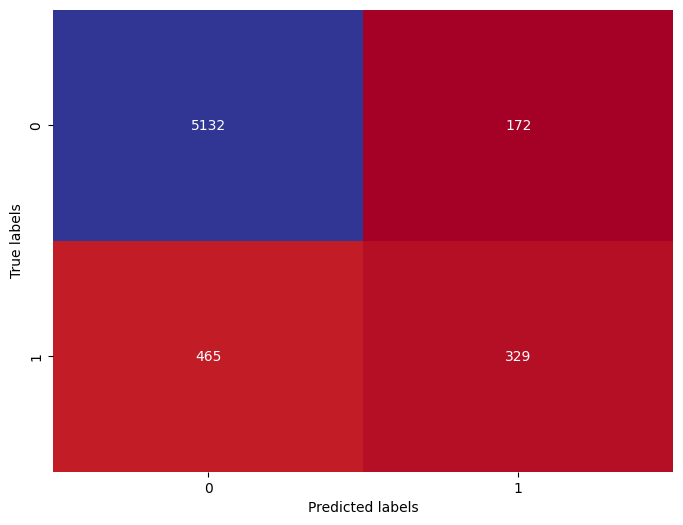

In [177]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, logistic_regression_predictions)
acc, rec, prec, f1, fpr = calculate_metrics(conf_matrix)
print("Accuracy:", round((acc), 2))
print("Recall:", round((rec), 2))
print("Precision:", round((prec), 2))
print("F1 Score:", round((f1), 2))
print("False Positive Rate:", round((fpr), 2))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdYlBu', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

results = []

results.append(["LogisticRegression", train_time, round((train_accuracy*100),2), test_time, round((logistic_regression_accuracy*100),2), 
                round((rec*100),2), round((prec*100),2), round((f1*100), 2), round((fpr*100),2)])


### Setting the Model Score

Accuracy : 85-90 % -  This will mean that when all the parameters of the campaign are fed, it can predict the success OR failure of deposit by the customer
For this excercise, the accuracy is the most important paremeter !! 

Precision : 66 % - This parameter indicates that the number of clients who were predicted as the ones who will deposit the money, how many have really deposited so?
Recall : 45 % - This parameter indicates that %age of clients who deposited the money but were not predicted by label.

**For this excercise, I would like to maximize the Accuracy (in the range of 80-90 %) and would like to maximixe the Prciesion and Recall rates into high 60-70 % age**

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

Training KNN...
Train Time: 0.0407 s
Train Accuracy: 0.9210
Test Time: 1.4704 s
Test Accuracy: 0.8877
Accuracy: 88.77
Recall: 42.07
Precision: 59.75
F1 Score: 49.37
False Positive Rate: 4.24


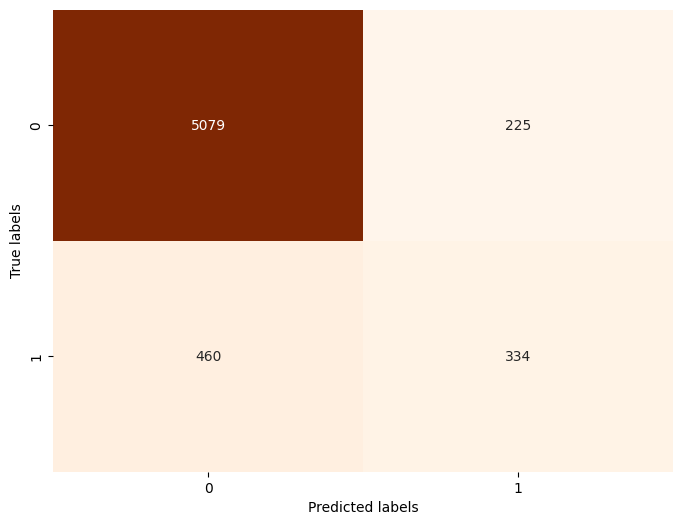

Training DecTree...
Train Time: 0.3259 s
Train Accuracy: 1.0000
Test Time: 0.0100 s
Test Accuracy: 0.8755
Accuracy: 87.55
Recall: 53.53
Precision: 52.15
F1 Score: 52.83
False Positive Rate: 7.35


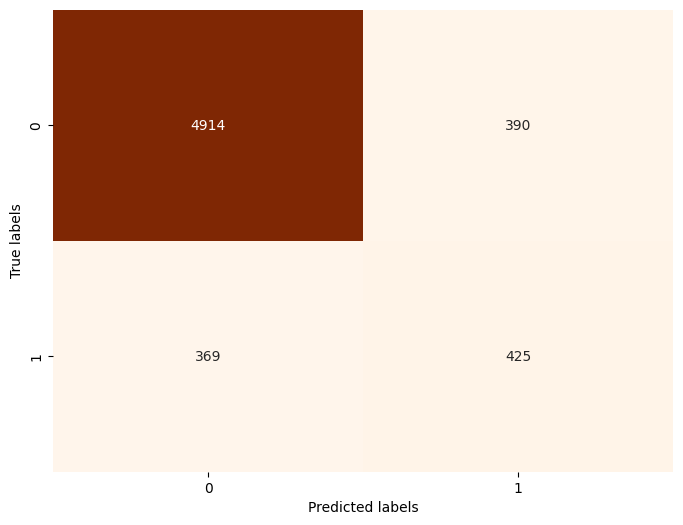

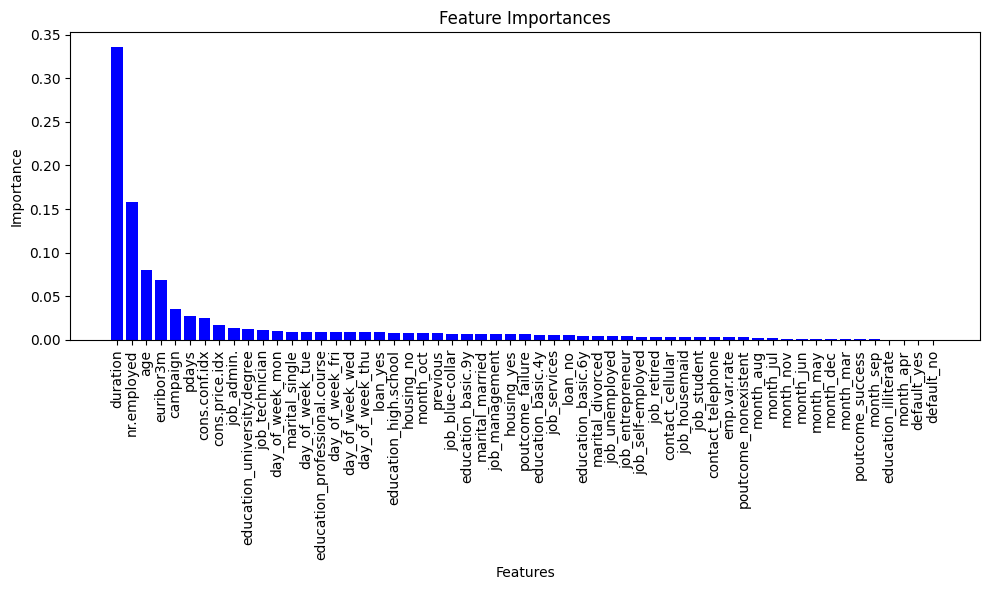

Training SVM...
Train Time: 17.1152 s
Train Accuracy: 0.9162
Test Time: 6.0216 s
Test Accuracy: 0.8959
Accuracy: 89.59
Recall: 40.3
Precision: 66.53
F1 Score: 50.2
False Positive Rate: 3.04


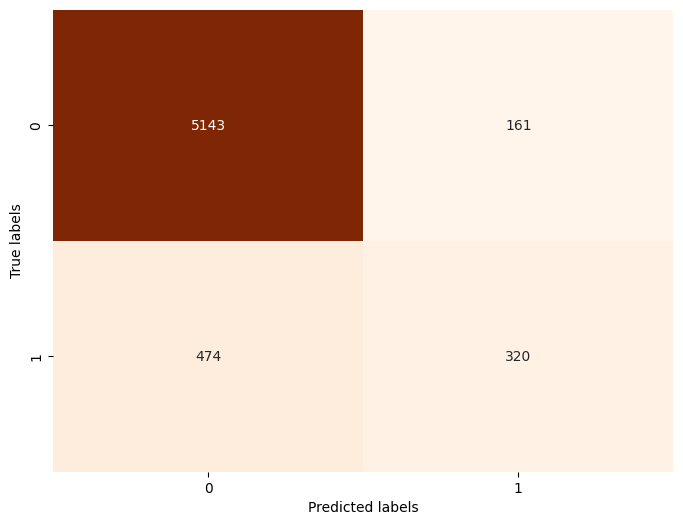

+--------------------+-----------------+------------------+----------------+-----------------+----------+-------------+-----------+-------+
| Classifier         |   Train Time(s) |   Train Accuracy |   Test Time(s) |   Test Accuracy |   Recall |   Precision |   F1Score |   FPR |
+====================+=================+==================+================+=================+==========+=============+===========+=======+
| LogisticRegression |       0.320297  |            90.21 |     0.0075016  |           89.55 |    41.44 |       65.67 |     50.81 |  3.24 |
+--------------------+-----------------+------------------+----------------+-----------------+----------+-------------+-----------+-------+
| KNN                |       0.0407088 |            92.1  |     1.47039    |           88.77 |    42.07 |       59.75 |     49.37 |  4.24 |
+--------------------+-----------------+------------------+----------------+-----------------+----------+-------------+-----------+-------+
| DecTree           

In [178]:
# Models
models = {
    "KNN": KNeighborsClassifier(),
    "DecTree": DecisionTreeClassifier(),
    "SVM": SVC()
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Training accuracy
    train_predictions = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)

    # Testing time and accuracy
    start_time = time.time()
    test_predictions = model.predict(X_test)
    test_time = time.time() - start_time
    test_accuracy = accuracy_score(y_test, test_predictions)

    print(f"Train Time: {train_time:.4f} s")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Time: {test_time:.4f} s")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, test_predictions)
    acc, rec, prec, f1, fpr = calculate_metrics(conf_matrix)
    print("Accuracy:", round((acc*100), 2))
    print("Recall:", round((rec*100), 2))
    print("Precision:", round((prec*100), 2))
    print("F1 Score:", round((f1*100), 2))
    print("False Positive Rate:", round((fpr*100), 2))

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    if(model_name=="DecTree") : 
        feature_importances = model.feature_importances_
        
        # Create a DataFrame to display feature importances
        importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

        # Sort the DataFrame by importance in descending order
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        # Print or visualize the feature importances
        #print(importance_df)

        # Plot the feature importances
        plt.figure(figsize=(10, 6))
        plt.bar(importance_df['Feature'], importance_df['Importance'], color='b')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.title('Feature Importances')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    
    
    results.append([model_name, train_time, round((train_accuracy*100),2), test_time, round((test_accuracy*100),2), round((rec*100),2), 
                    round((prec*100),2), round((f1*100),2), round((fpr*100),2)])

# Display results in a table
headers = ["Classifier", "Train Time(s)", "Train Accuracy", "Test Time(s)", "Test Accuracy", "Recall", "Precision", "F1Score", "FPR"]
print(tabulate(results, headers=headers, tablefmt="grid"))


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [140]:
## As the Precision and F1 scores are low, I will try to evaluate the feature importance in decision trees
## it clearly states that "duration" is the most important parameter. So We will not remove that
## Now can we evaluate if the precision, and recalls are low due to overfitting?

In [182]:
### Lets evaluate if just getting rid of duration helps?

df_a = df_orig.copy() 

## Initial Shape
print ("Initial Shape = ", df_a.shape)

#print (df['pdays'].unique())

# Assuming df is your DataFrame with both numerical and categorical features
# Replace df with your actual DataFrame

# Select the specific columns to scale
columns_to_scale = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                    'euribor3m', 'nr.employed']  # Add the names of columns you want to scale

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler to the selected columns
scaled_data = scaler.fit_transform(df_a[columns_to_scale])

# Replace the original columns with the scaled columns in the DataFrame
for i, col in enumerate(columns_to_scale):
    df_a[col] = scaled_data[:, i]

# Replace 'unknown' values in categorical features with NaN
#df[categorical_features] = df[categorical_features].replace('unknown', 'NaN')

# Specific value to check
specific_value = 'unknown'
# Initialize a dictionary to store the presence of the specific value in each column
value_presence = {}

# Iterate over each column
for column in df_a.select_dtypes(include=['object']).columns:
    # Check if the specific value is present in the column
    #is_present = specific_value in df[column].values
    
    # Count occurrences of the specific value in the column
    count = df_a[column].value_counts().get(specific_value, 0)
    value_presence[column] = count

# Convert the dictionary to a pandas Series for easy visualization
value_presence_series = pd.Series(value_presence)
# Display the presence of the specific value in each column
print("Presence of '{}' in each categorical column:".format(specific_value))
print(value_presence_series)

## Lets drop the columns that have too many Unknowns 
##df_a.drop(columns=['default', 'education'], inplace=True)

categorical_features = ["job", "marital", 'default', 'education', "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

# Iterate over each column
#for column in df_a.select_dtypes(include=['object']).columns:
    # Boolean index to filter out rows containing the specific value
#    df_a = df_a[~(df_a[column] == specific_value)]

## Initial Shape
print ("After dropping all unknowns = ", df_a.shape)

#Convert 'pdays' values of 999 to NaN
#df['pdays'] = df['pdays'].replace(999, 100000)

# Check for NaN values in each categorical column
nan_counts_categorical = df_a[categorical_features].isna().sum()
# Display NaN counts for categorical columns
print("NaN counts in categorical columns:")
print(nan_counts_categorical)

if(nan_counts_categorical.sum()>0) : 
    # Drop rows with NaN values
    df_a.dropna(inplace=True)
    print ("Dropped all NaN value rows") 
    
## Initial Shape
print ("After dropping NaN Shape = ", df_a.shape)

# Perform one-hot encoding
df_ae = pd.get_dummies(df_a, columns=categorical_features, dtype=int)
print ("Shape of y", df_ae['y'].shape)

# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Fit label encoder and transform the output variable
df_ae['y'] = label_encoder.fit_transform(df_ae['y'])

## Drop y from Df
Y_fet = df_ae['y']
#print ("The output variable = ", Y_fet.nunique()) 

# Drop the target variable column "y"
df_ae.drop(columns=['y'], inplace=True)

# Check the data types after modifications
#print("\nData types after modifications:\n", df_ae.dtypes)

#print (df_ae.info())
#print (df_e.head())

X_fet = df_ae.copy() 

Initial Shape =  (41188, 21)
Presence of 'unknown' in each categorical column:
job             330
marital          80
education      1731
default        8597
housing         990
loan            990
contact           0
month             0
day_of_week       0
poutcome          0
y                 0
dtype: int64
After dropping all unknowns =  (41188, 21)
NaN counts in categorical columns:
job            0
marital        0
default        0
education      0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64
After dropping NaN Shape =  (41188, 21)
Shape of y (41188,)


In [183]:
# Split the data into train and test sets (80% train, 20% test)
Xfet_train, Xfet_test, yfet_train, yfet_test = train_test_split(X_fet, Y_fet, test_size=0.2, random_state=42)

# Verify the shapes of the train and test sets
print("X_train shape:", Xfet_train.shape)
print("X_test shape:", Xfet_test.shape)
print("y_train shape:", yfet_train.shape)
print("y_test shape:", yfet_test.shape)

X_train shape: (32950, 63)
X_test shape: (8238, 63)
y_train shape: (32950,)
y_test shape: (8238,)


Training Logistic_FetureEng...
Train Time: 0.4857 s
Train Accuracy: 0.9120
Test Time: 0.0097 s
Test Accuracy: 0.9111
Accuracy: 91.11
Recall: 42.99
Precision: 66.89
F1 Score: 52.34
False Positive Rate: 2.72


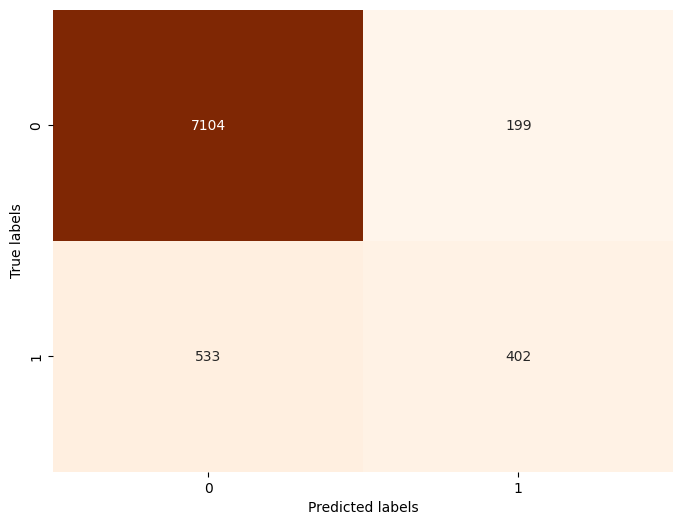

Training KNN_FetEng...
Train Time: 0.0283 s
Train Accuracy: 0.9278
Test Time: 2.4003 s
Test Accuracy: 0.9007
Accuracy: 90.07
Recall: 44.06
Precision: 58.27
F1 Score: 50.18
False Positive Rate: 4.04


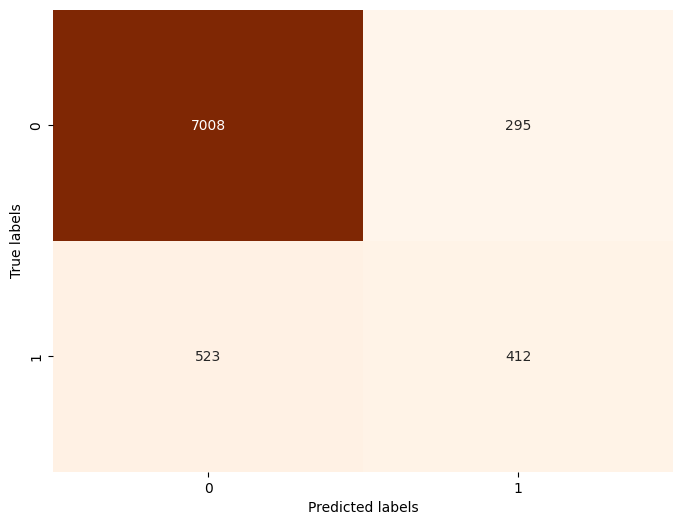

Training DTrees_FetEng...
Train Time: 0.5816 s
Train Accuracy: 1.0000
Test Time: 0.0089 s
Test Accuracy: 0.8875
Accuracy: 88.75
Recall: 52.41
Precision: 50.41
F1 Score: 51.39
False Positive Rate: 6.6


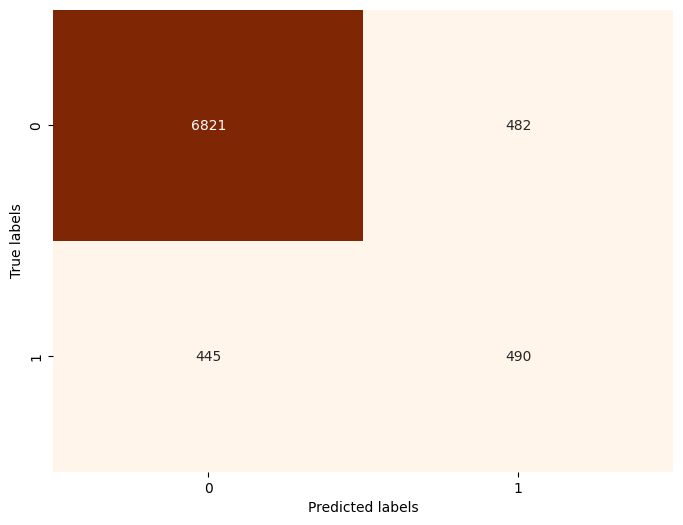

Training SVM_FetEng...
Train Time: 44.5829 s
Train Accuracy: 0.9227
Test Time: 11.1820 s
Test Accuracy: 0.9120
Accuracy: 91.2
Recall: 43.32
Precision: 67.5
F1 Score: 52.77
False Positive Rate: 2.67


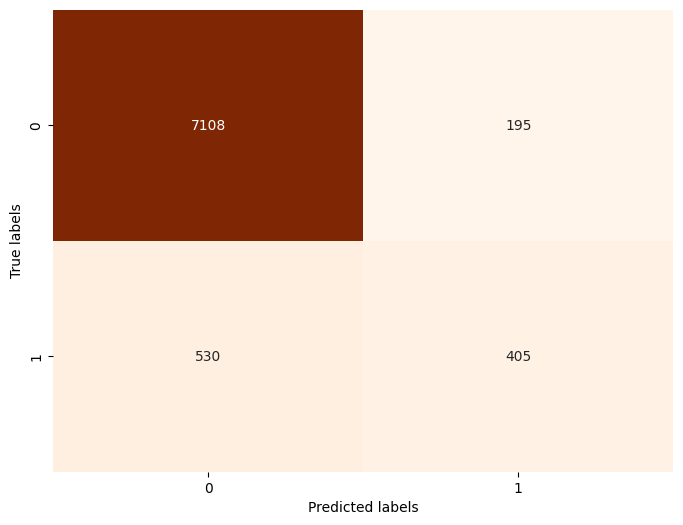

+--------------------+-----------------+------------------+----------------+-----------------+----------+-------------+-----------+-------+
| Classifier         |   Train Time(s) |   Train Accuracy |   Test Time(s) |   Test Accuracy |   Recall |   Precision |   F1Score |   FPR |
+====================+=================+==================+================+=================+==========+=============+===========+=======+
| LogisticRegression |       0.320297  |            90.21 |     0.0075016  |           89.55 |    41.44 |       65.67 |     50.81 |  3.24 |
+--------------------+-----------------+------------------+----------------+-----------------+----------+-------------+-----------+-------+
| KNN                |       0.0407088 |            92.1  |     1.47039    |           88.77 |    42.07 |       59.75 |     49.37 |  4.24 |
+--------------------+-----------------+------------------+----------------+-----------------+----------+-------------+-----------+-------+
| DecTree           

In [184]:
# Models
models = { 
    "Logistic_FetureEng" :  LogisticRegression(),
    "KNN_FetEng": KNeighborsClassifier(),
    "DTrees_FetEng": DecisionTreeClassifier(),
    "SVM_FetEng": SVC()
}

results_fetEng = []

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    start_time = time.time()
    model.fit(Xfet_train, yfet_train)
    train_time = time.time() - start_time

    # Training accuracy
    train_predictions = model.predict(Xfet_train)
    train_accuracy = accuracy_score(yfet_train, train_predictions)

    # Testing time and accuracy
    start_time = time.time()
    test_predictions = model.predict(Xfet_test)
    test_time = time.time() - start_time
    test_accuracy = accuracy_score(yfet_test, test_predictions)

    print(f"Train Time: {train_time:.4f} s")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Time: {test_time:.4f} s")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(yfet_test, test_predictions)
    acc, rec, prec, f1, fpr = calculate_metrics(conf_matrix)
    print("Accuracy:", round((acc*100), 2))
    print("Recall:", round((rec*100), 2))
    print("Precision:", round((prec*100), 2))
    print("F1 Score:", round((f1*100), 2))
    print("False Positive Rate:", round((fpr*100), 2))

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    results_fetEng.append([model_name, train_time, round((train_accuracy*100),2), test_time, round((test_accuracy*100),2), round((rec*100),2), 
                    round((prec*100),2), round((f1*100),2), round((fpr*100),2)])

# Display results in a table
headers = ["Classifier", "Train Time(s)", "Train Accuracy", "Test Time(s)", "Test Accuracy", "Recall", "Precision", "F1Score", "FPR"]
print(tabulate(results, headers=headers, tablefmt="grid"))
print(tabulate(results_fetEng, headers=headers, tablefmt="grid"))

In [125]:
### Not start tuning hyper parameters and check the effect on the results 


Hyperparameter tuning for Logistic Regression


C:\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the co

Logistic Regression Best Parameters: {'C': 0.1, 'solver': 'saga'}
Logistic Regression Best Score: 0.9111684370257966
Logistic Regression Train Time: 100.58539485931396
Logistic Regression Test Time: 0.011981487274169922

Accuracy: 91.11
Recall: 42.57
Precision: 67.12
F1 Score: 52.09
False Positive Rate: 2.67


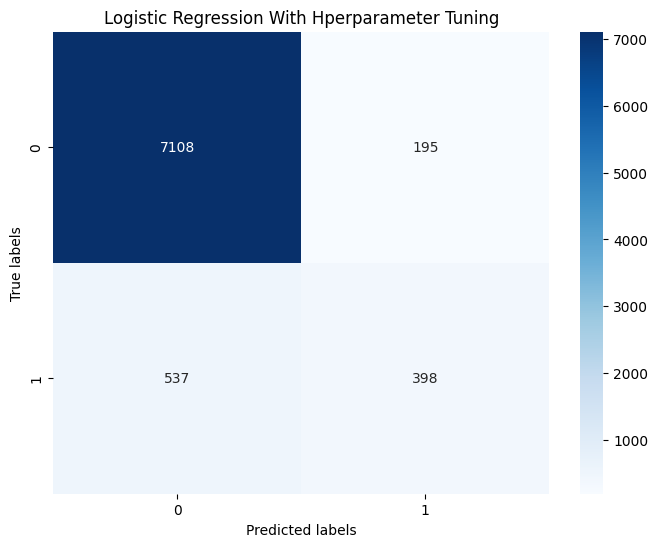

Hyperparameter tuning for K-Nearest Neighbors Regression
K-Nearest Neighbors Best Parameters: {'n_neighbors': 11}
K-Nearest Neighbors Best Score: 0.9045523520485584
K-Nearest Neighbors Train Time: 25.42536234855652
K-Nearest Neighbors Test Time: 2.0655264854431152

Accuracy: 90.51
Recall: 41.39
Precision: 62.32
F1 Score: 49.74
False Positive Rate: 3.2


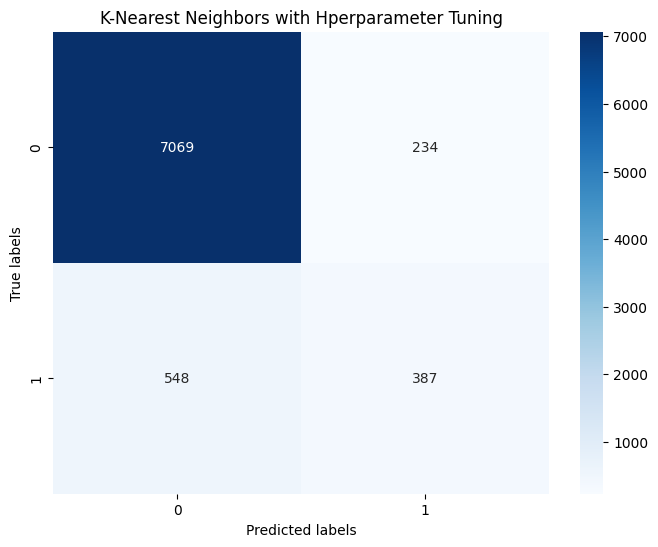

Hyperparameter tuning for Decision Tree based Runs
Decision Tree Best Parameters: {'max_depth': 5, 'min_samples_split': 5}
Decision Tree Best Score: 0.91350531107739
Decision Tree Train Time: 16.703710317611694
Decision Tree Test Time: 0.008688211441040039

Accuracy: 91.5
Recall: 54.22
Precision: 65.08
F1 Score: 59.16
False Positive Rate: 3.72


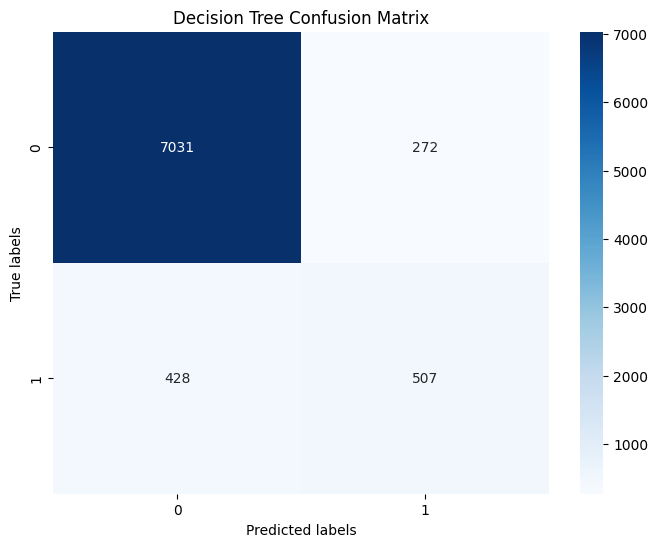

Hyperparameter tuning for SVM classifier
Support Vector Machine Best Parameters: {'C': 1, 'kernel': 'rbf'}
Support Vector Machine Best Score: 0.9115326251896813
Support Vector Machine Train Time: 506.5232288837433
Support Vector Machine Test Time: 9.46170973777771

Accuracy: 91.2
Recall: 43.32
Precision: 67.5
F1 Score: 52.77
False Positive Rate: 2.67


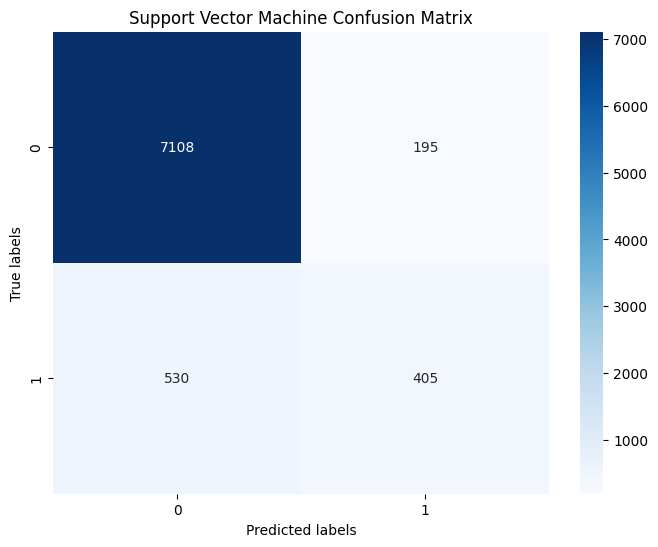

+--------------------+-----------------+------------------+----------------+-----------------+----------+-------------+-----------+-------+
| Classifier         |   Train Time(s) |   Train Accuracy |   Test Time(s) |   Test Accuracy |   Recall |   Precision |   F1Score |   FPR |
+====================+=================+==================+================+=================+==========+=============+===========+=======+
| LogisticRegression |       0.320297  |            90.21 |     0.0075016  |           89.55 |    41.44 |       65.67 |     50.81 |  3.24 |
+--------------------+-----------------+------------------+----------------+-----------------+----------+-------------+-----------+-------+
| KNN                |       0.0407088 |            92.1  |     1.47039    |           88.77 |    42.07 |       59.75 |     49.37 |  4.24 |
+--------------------+-----------------+------------------+----------------+-----------------+----------+-------------+-----------+-------+
| DecTree           

In [186]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV

def plot_confusion_matrix(y_true, y_pred, title, results_fetEng_hyp, model_name, train_time, test_time, train_accuracy, test_accuracy) :
    cm = confusion_matrix(y_true, y_pred)
    
    acc, rec, prec, f1, fpr = calculate_metrics(cm)
    print("Accuracy:", round((acc*100), 2))
    print("Recall:", round((rec*100), 2))
    print("Precision:", round((prec*100), 2))
    print("F1 Score:", round((f1*100), 2))
    print("False Positive Rate:", round((fpr*100), 2))

    results_fetEng_hyp.append([model_name, train_time, round((train_accuracy*100),2), test_time, round((test_accuracy*100),2), round((rec*100),2), 
                           round((prec*100),2), round((f1*100),2), round((fpr*100),2)])
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()


results_fetEng_hyp = []

# Assuming Xfet_train, Xfet_test, yfet_train, and yfet_test are your training and testing features and labels
# Replace Xfet_train, Xfet_test, yfet_train, and yfet_test with your actual data

print("Hyperparameter tuning for Logistic Regression")

# Logistic Regression
lr_params = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga']}
lr = LogisticRegression()
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy')

start_time = time.time()
lr_grid.fit(Xfet_train, yfet_train)
end_time = time.time()

lr_train_time = end_time - start_time

lr_best_params = lr_grid.best_params_
lr_best_score = lr_grid.best_score_

start_time = time.time()
lr_pred = lr_grid.predict(Xfet_test)
end_time = time.time()

lr_test_time = end_time - start_time

# Training accuracy
train_predictions = model.predict(Xfet_train)
train_accuracy = accuracy_score(yfet_train, train_predictions)
test_accuracy = accuracy_score(yfet_test, lr_pred)

# Print best parameters, scores, train and test times for each classifier
print("Logistic Regression Best Parameters:", lr_best_params)
print("Logistic Regression Best Score:", lr_best_score)
print("Logistic Regression Train Time:", lr_train_time)
print("Logistic Regression Test Time:", lr_test_time)
print()
                                                                                                                  
plot_confusion_matrix(yfet_test, lr_pred, "Logistic Regression With Hperparameter Tuning", results_fetEng_hyp, "Logistic_WithHyper", lr_train_time, lr_test_time, train_accuracy, test_accuracy)

print("Hyperparameter tuning for K-Nearest Neighbors Regression")

# K-Nearest Neighbors
knn_params = {'n_neighbors': [7, 9, 11]}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')

start_time = time.time()
knn_grid.fit(Xfet_train, yfet_train)
end_time = time.time()

knn_train_time = end_time - start_time

knn_best_params = knn_grid.best_params_
knn_best_score = knn_grid.best_score_

start_time = time.time()
knn_pred = knn_grid.predict(Xfet_test)
end_time = time.time()

knn_test_time = end_time - start_time

# Training accuracy
train_predictions = model.predict(Xfet_train)
train_accuracy = accuracy_score(yfet_train, train_predictions)
test_accuracy = accuracy_score(yfet_test, knn_pred)

print("K-Nearest Neighbors Best Parameters:", knn_best_params)
print("K-Nearest Neighbors Best Score:", knn_best_score)
print("K-Nearest Neighbors Train Time:", knn_train_time)
print("K-Nearest Neighbors Test Time:", knn_test_time)
print()
                                                                                                                 
plot_confusion_matrix(yfet_test, knn_pred, "K-Nearest Neighbors with Hperparameter Tuning", results_fetEng_hyp, "KNN_WithHypTuning", knn_train_time, knn_test_time, train_accuracy, test_accuracy)

print("Hyperparameter tuning for Decision Tree based Runs")

# Decision Tree
dt_params = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')

start_time = time.time()
dt_grid.fit(Xfet_train, yfet_train)
end_time = time.time()

dt_train_time = end_time - start_time

dt_best_params = dt_grid.best_params_
dt_best_score = dt_grid.best_score_

start_time = time.time()
dt_pred = dt_grid.predict(Xfet_test)
end_time = time.time()

dt_test_time = end_time - start_time

# Training accuracy
train_predictions = model.predict(Xfet_train)
train_accuracy = accuracy_score(yfet_train, train_predictions)
test_accuracy = accuracy_score(yfet_test, dt_pred)

print("Decision Tree Best Parameters:", dt_best_params)
print("Decision Tree Best Score:", dt_best_score)
print("Decision Tree Train Time:", dt_train_time)
print("Decision Tree Test Time:", dt_test_time)
print()
                                                                                                   
plot_confusion_matrix(yfet_test, dt_pred, "Decision Tree Confusion Matrix", results_fetEng_hyp,  "DecTree_WithHyper", dt_train_time, dt_test_time, train_accuracy, test_accuracy)

print("Hyperparameter tuning for SVM classifier")

# Support Vector Machine
svm_params = {'C': [0.1, 1, 10], 'kernel': ['rbf']}
svm = SVC()
svm_grid = GridSearchCV(svm, svm_params, cv=None, scoring='accuracy')

start_time = time.time()
svm_grid.fit(Xfet_train, yfet_train)
end_time = time.time()

svm_train_time = end_time - start_time

svm_best_params = svm_grid.best_params_
svm_best_score = svm_grid.best_score_

start_time = time.time()
svm_pred = svm_grid.predict(Xfet_test)
end_time = time.time()

svm_test_time = end_time - start_time

# Training accuracy
train_predictions = model.predict(Xfet_train)
train_accuracy = accuracy_score(yfet_train, train_predictions)
test_accuracy = accuracy_score(yfet_test, svm_pred)


print("Support Vector Machine Best Parameters:", svm_best_params)
print("Support Vector Machine Best Score:", svm_best_score)
print("Support Vector Machine Train Time:", svm_train_time)
print("Support Vector Machine Test Time:", svm_test_time)
print()
                                                                                                        
plot_confusion_matrix(yfet_test, svm_pred, "Support Vector Machine Confusion Matrix", results_fetEng_hyp, "SVM_WithHypTuning", svm_train_time, svm_test_time, train_accuracy, test_accuracy)

# Display results in a table
headers = ["Classifier", "Train Time(s)", "Train Accuracy", "Test Time(s)", "Test Accuracy", "Recall", "Precision", "F1Score", "FPR"]
print(tabulate(results, headers=headers, tablefmt="grid"))
print(tabulate(results_fetEng, headers=headers, tablefmt="grid"))
print(tabulate(results_fetEng_hyp, headers=headers, tablefmt="grid"))

## Results ## 
From the above results, its clear that with some feature engineering and hyper parameter tuning, the accuracy, precision and recall results have improved.

**For the current application, based on results, I will recommend Decision Tree algorithm with specific hyper parameters to the customer** 


##### Questions